In [71]:
from plot import *
from resample import *
from simulate import *

from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle

In [145]:
def _make_circle(color, size, x, y, alpha):
    da = DrawingArea(0, 0, 0, 0)
    p = mpatches.Circle((0, 0), size, color=color, alpha=alpha)
    da.add_artist(p)

    c1 = AnnotationBbox(da, 
                        (x,y),
                        xybox=(0, 0),
                        frameon=False,
                        xycoords=("data", "axes fraction"),
                        box_alignment=(0.5, 0.5),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"},
                        pad=0)
    return c1

subtree_type_list = ['doublet',
                     'triplet',
                     'asym_quartet',
                     'asym_quintet',
                     'asym_sextet',
                     'asym_septet']

index_list = [[1,3], 
              [1,4,6], 
              [1,4,7,9], 
              [1,4,7,10,12], 
              [1,4,7,10,13,15], 
              [1,4,7,10,13,16,18]
              ]

y_list = [[-0.05, -0.10], 
          [-0.05, -0.12, -0.17],
          [-0.05, -0.12, -0.19, -0.24],
          [-0.05, -0.12, -0.19, -0.26, -0.31],
          [-0.05, -0.12, -0.19, -0.26, -0.33, -0.38],
          [-0.05, -0.12, -0.19, -0.26, -0.33, -0.40, -0.45]
         ]

df_annotations = pd.DataFrame({'subtree_type': subtree_type_list,
                               'index': index_list,
                               'y': y_list,
                               })
df_annotations

,subtree_type,index,y
0,doublet,"[1, 3]","[-0.05, -0.1]"
1,triplet,"[1, 4, 6]","[-0.05, -0.12, -0.17]"
2,asym_quartet,"[1, 4, 7, 9]","[-0.05, -0.12, -0.19, -0.24]"
3,asym_quintet,"[1, 4, 7, 10, 12]","[-0.05, -0.12, -0.19, -0.26, -0.31]"
4,asym_sextet,"[1, 4, 7, 10, 13, 15]","[-0.05, -0.12, -0.19, -0.26, -0.33, -0.38]"
5,asym_septet,"[1, 4, 7, 10, 13, 16, 18]","[-0.05, -0.12, -0.19, -0.26, -0.33, -0.4, -0.45]"


In [146]:
def make_annotation(i, label, subtree_type):
    index_list_subtree = df_annotations.loc[df_annotations['subtree_type']==subtree_type]['index'].values[0]
    y_list_subtree = df_annotations.loc[df_annotations['subtree_type']==subtree_type]['y'].values[0]

    for index, y in zip(index_list_subtree, y_list_subtree):
        c_str = label[index]
        x = i+0.5
        ax.add_artist(_make_circle(cell_color_dict[c_str], 4.5, x, y, 0.4))
        ax.annotate(c_str, 
                    xy=(x, y), 
                    verticalalignment="center", 
                    horizontalalignment="center",
                    annotation_clip=False, 
                    xycoords=("data", "axes fraction"),
                    **{'fontname':'DejaVu Sans', 'size':8})

In [147]:
cell_color_dict = make_color_dict(['A', 'B', 'C', 'D', 'E', 'F'], ['#F89A3A', '#9C80B8', '#F071AB', '#F0E135','#5FC0D4', '#7EC352',])

In [28]:
subtree_list = ['doublet',
                'triplet',
                'asym_quartet',
                'asym_quintet',
                'asym_sextet', 
                'asym_septet',
                ]

subtree_label_list = ['(F,F)',
                      '(E,(F,F))',
                      '(D,(E,(F,F)))',
                      '(C,(D,(E,(F,F))))',
                      '(B,(C,(D,(E,(F,F)))))',
                      '(A,(B,(C,(D,(E,(F,F))))))',
                      ]

num_trees_list = [10, 50, 100, 500, 1000, 5000, 10000, 50000]

meta_list = []

for subtree, subtree_label in zip(subtree_list, subtree_label_list):
    for num_trees in num_trees_list:
        for rep in range(10):
            df_true_melt_subset = pd.read_csv(f'../../../groups/Clustowitz/mtran/lineage_motif/simulation_data/df_true_melt_subset_{subtree}_trees{num_trees}_rep{rep}.csv', index_col=0)
            if subtree_label in df_true_melt_subset['label'].values:
                z_score = df_true_melt_subset.loc[df_true_melt_subset['label']==subtree_label]['z-score'].values[0]
            else:
                z_score = 0
            meta_list.append([subtree, subtree_label, num_trees, rep, z_score])

In [29]:
df_meta = pd.DataFrame(meta_list, columns=['subtree', 'label', 'num_trees', 'rep', 'z_score'])
df_meta

,subtree,label,num_trees,rep,z_score
0,doublet,"(F,F)",10,0,6.937281
1,doublet,"(F,F)",10,1,7.196564
2,doublet,"(F,F)",10,2,8.099582
3,doublet,"(F,F)",10,3,0.000000
4,doublet,"(F,F)",10,4,7.185512
...,...,...,...,...,...
475,asym_septet,"(A,(B,(C,(D,(E,(F,F))))))",50000,5,0.000000
476,asym_septet,"(A,(B,(C,(D,(E,(F,F))))))",50000,6,0.000000
477,asym_septet,"(A,(B,(C,(D,(E,(F,F))))))",50000,7,0.000000
478,asym_septet,"(A,(B,(C,(D,(E,(F,F))))))",50000,8,0.000000


In [23]:
read_dataset(f"../../../groups/Clustowitz/mtran/lineage_motif/simulation_data/trees_trees{num_trees}_rep{rep}.txt")

['(A,A)',
 '(A,(B,B))',
 '(A,(B,B))',
 '(((C,(C,C)),(C,C)),A)',
 '(A,(B,B))',
 '(A,(B,B))',
 '(((C,(C,C)),(((D,D),(E,E)),C)),A)',
 '(A,(B,(B,B)))',
 '((B,((D,D),(((C,C),((D,D),(C,((D,D),(D,D))))),C))),A)',
 '(A,(A,A))',
 '']

In [95]:
df_meta_hm = df_meta.groupby(['label', 'num_trees'])['z_score'].mean().to_frame().reset_index().pivot(index='num_trees', columns='label', values='z_score')
df_meta_hm

label,"(A,(B,(C,(D,(E,(F,F))))))","(B,(C,(D,(E,(F,F)))))","(C,(D,(E,(F,F))))","(D,(E,(F,F)))","(E,(F,F))","(F,F)"
num_trees,,,,,,
10,0.0,-0.061008,0.737854,1.917644,2.709514,6.205412
50,0.0,0.726083,1.346087,3.824524,5.694832,15.021226
100,0.0,0.196908,1.978057,4.505475,7.577984,21.512826
500,0.0,1.713913,3.227072,8.051956,16.632493,47.310650
1000,0.0,3.113791,6.779793,13.150728,24.778856,67.507835
5000,0.0,7.545629,14.324773,28.075628,54.907370,149.083896
10000,0.0,11.074242,20.552437,39.520541,78.949592,211.775193
50000,0.0,24.045081,45.939916,89.434932,175.556001,476.275490


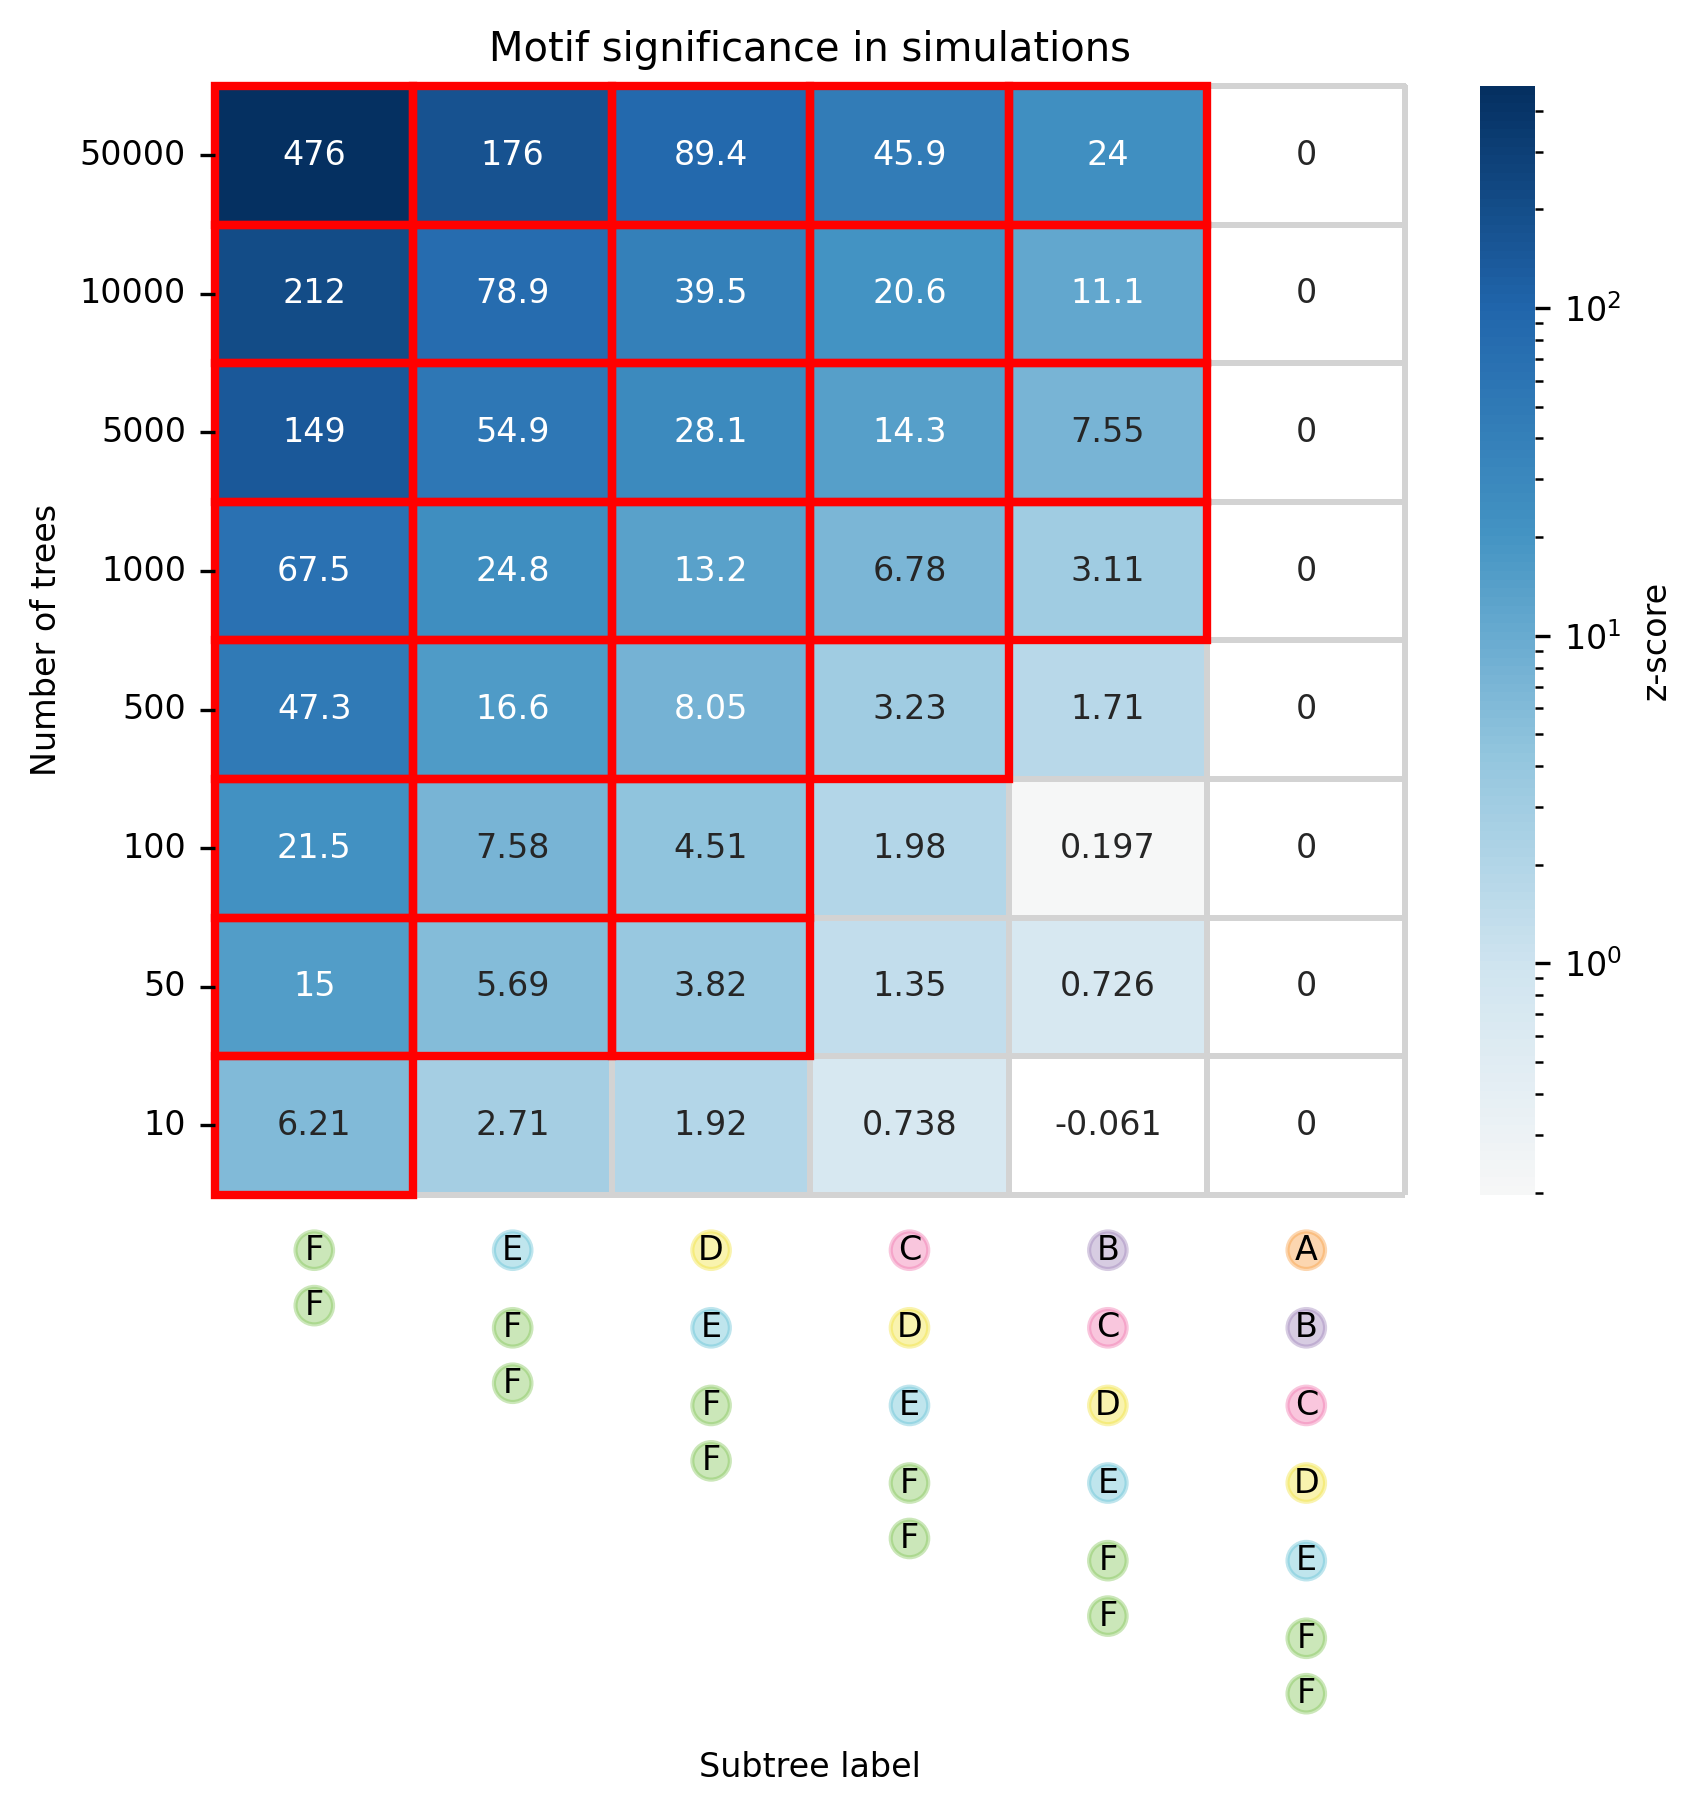

In [154]:
fig, ax = pyplot.subplots()

hm_vals = df_meta_hm.values
significant_cells = [(k, i) for i, j in enumerate(hm_vals) for k, l in enumerate(j) if (l > 3)]

my_cmap = mpl.colors.LinearSegmentedColormap.from_list(colors=sns.color_palette("RdBu", n_colors=512)[256:], name='blues')
my_cmap.set_bad((1,1,1))
g = sns.heatmap(df_meta_hm, 
                annot=True, 
                fmt='.3g', 
                norm=LogNorm(), 
                cmap=my_cmap, 
                cbar_kws={'label': 'z-score'}, 
                linewidths=1, 
                linecolor='lightgray', 
                clip_on=False,
                xticklabels=False)

# add boxes around significant cells
for significant_cell in significant_cells:
    g.add_patch(Rectangle(significant_cell, 1, 1, fill=False, edgecolor='red', lw=2, clip_on=False))  
    
g.invert_yaxis()
g.invert_xaxis()
    
pyplot.ylabel("Number of trees")
pyplot.xlabel("Subtree label", labelpad=130)
pyplot.title("Motif significance in simulations")

pyplot.yticks(rotation=0)

for i, (subtree_label, subtree_type) in enumerate(zip(subtree_label_list[::-1], subtree_type_list[::-1])):
    make_annotation(i, subtree_label, subtree_type)

In [116]:
subtree_label

'(D,(E,(F,F)))'

In [75]:
def _make_circle(color, size, x, y, alpha):
    da = DrawingArea(0, 0, 0, 0)
    p = mpatches.Circle((0, 0), size, color=color, alpha=alpha)
    da.add_artist(p)

    c1 = AnnotationBbox(da, 
                        (x,y),
                        xybox=(0, 0),
                        frameon=False,
                        xycoords=("data", "axes fraction"),
                        box_alignment=(0.5, 0.5),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"},
                        pad=0)
    return c1

In [85]:
def _make_circle(color, size, x, y, alpha):
    da = DrawingArea(0, 0, 0, 0)
    p = mpatches.Circle((0, 0), size, color=color, alpha=alpha)
    da.add_artist(p)

    c1 = AnnotationBbox(da, 
                        (x,y),
                        xybox=(0, 0),
                        frameon=False,
                        xycoords=("data", "axes fraction"),
                        box_alignment=(0.5, 0.5),
                        boxcoords="offset points",
                        bboxprops={"edgecolor" : "none"},
                        pad=0)
    return c1

subtree_type_list = ['doublet',
                     'triplet',
                     'quartet', 
                     'asym_quartet',
                     'asym_quintet',
                     'asym_sextet',
                     'asym_septet']

index_list = [[1,3], 
              [1,4,6], 
              [2,4,8,10], 
              [1,4,7,9], 
              [1,4,7,10,12], 
              [1,4,7,10,13,15], 
              [1,4,7,10,13,16,18]
              ]

y_list = [[-0.06, -0.15], 
          [-0.06, -0.18, -0.27],
          [-0.06, -0.15, -0.27, -0.36],
          [-0.06, -0.18, -0.30, -0.39],
          [-0.06, -0.18, -0.30, -0.42, -0.51],
          [-0.06, -0.18, -0.30, -0.42, -0.54, -0.63],
          [-0.06, -0.18, -0.30, -0.42, -0.54, -0.66, -0.75]
         ]

labelpad_list = [22.5, 40, 52.5, 60, 80, 100, 120]

df_annotations = pd.DataFrame({'subtree_type': subtree_type_list,
                               'index': index_list,
                               'y': y_list,
                               'labelpad': labelpad_list})
df_annotations

,subtree_type,index,y,labelpad
0,doublet,"[1, 3]","[-0.06, -0.15]",22.5
1,triplet,"[1, 4, 6]","[-0.06, -0.18, -0.27]",40.0
2,quartet,"[2, 4, 8, 10]","[-0.06, -0.15, -0.27, -0.36]",52.5
3,asym_quartet,"[1, 4, 7, 9]","[-0.06, -0.18, -0.3, -0.39]",60.0
4,asym_quintet,"[1, 4, 7, 10, 12]","[-0.06, -0.18, -0.3, -0.42, -0.51]",80.0
5,asym_sextet,"[1, 4, 7, 10, 13, 15]","[-0.06, -0.18, -0.3, -0.42, -0.54, -0.63]",100.0
6,asym_septet,"[1, 4, 7, 10, 13, 16, 18]","[-0.06, -0.18, -0.3, -0.42, -0.54, -0.66, -0.75]",120.0


In [77]:
def make_annotation(label, subtree_type):
    index_list_subtree = df_annotations.loc[df_annotations['subtree_type']==subtree_type]['index'].values[0]
    y_list_subtree = df_annotations.loc[df_annotations['subtree_type']==subtree_type]['y'].values[0]

    for index, y in zip(index_list_subtree, y_list_subtree):
        c_str = label[index]
        x = label
        ax.add_artist(_make_circle(cell_color_dict[c_str], 4.5, x, y, 0.4))
        ax.annotate(c_str, 
                    xy=(x, y), 
                    verticalalignment="center", 
                    horizontalalignment="center",
                    annotation_clip=False, 
                    xycoords=("data", "axes fraction"),
                    **{'fontname':'DejaVu Sans', 'size':8})

1 -0.06
3 -0.15
1 -0.06
4 -0.18
6 -0.27
1 -0.06
4 -0.18
7 -0.3
9 -0.39
1 -0.06
4 -0.18
7 -0.3
10 -0.42
12 -0.51
1 -0.06
4 -0.18
7 -0.3
10 -0.42
13 -0.54
15 -0.63


Text(0.5, 0, 'Subtree label')

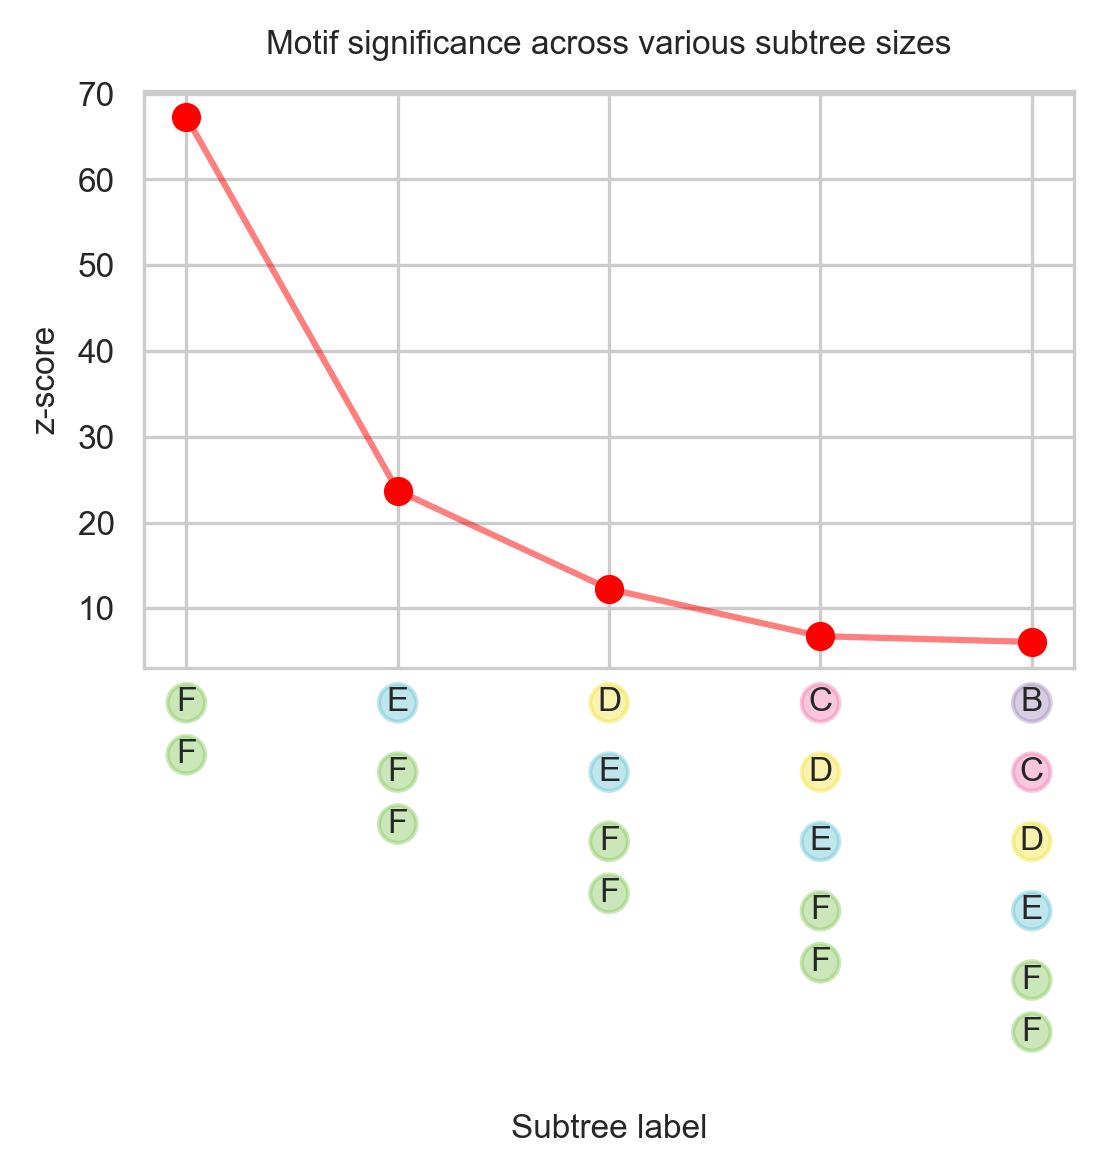

In [83]:
margins=0.05
bbox_to_anchor=(0, 0)  
figsize=(4, 2.5)

sns.set_style('whitegrid')
fig, ax = pyplot.subplots(figsize=figsize)
pyplot.setp(ax.collections)

pyplot.scatter(subtree_label_list, z_score_list, color='red')
pyplot.plot(subtree_label_list, z_score_list, color='red', alpha=0.5)

pyplot.grid(True)
ax.set_xticklabels([])

pyplot.title(f'Motif significance across various subtree sizes', y=1.02, **{'fontname':'DejaVu Sans', 'size':8})#, fontweight='bold')
pyplot.ylabel('z-score', **{'fontname':'DejaVu Sans', 'size':8})
pyplot.yticks(**{'fontname':'DejaVu Sans', 'size':8})

subtree_type_list = ['doublet',
                     'triplet',
                     'asym_quartet',
                     'asym_quintet',
                     'asym_sextet'
                     ]

for subtree_label, subtree_type in zip(subtree_label_list, subtree_type_list):
    make_annotation(subtree_label, subtree_type)

pyplot.xlabel('Subtree label', labelpad=100, **{'fontname':'DejaVu Sans', 'size':8})